In [1]:
import seaborn as sns
import pandas as pd 
import pylab as plt
import numpy as np
import copy
import plot_functions as plotf
import bootstrap_functions as bootf
import model_functions as modelf
import read_experimental_data as e_data

sns.set_context('notebook', font_scale=1.7, rc={'lines.linewidth': 1.3, 'axes.facecolor': 'white'})
np.random.seed(0)
%matplotlib inline

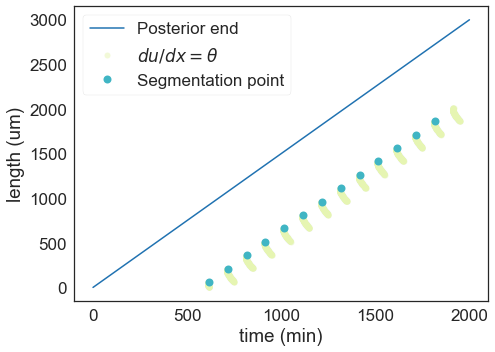

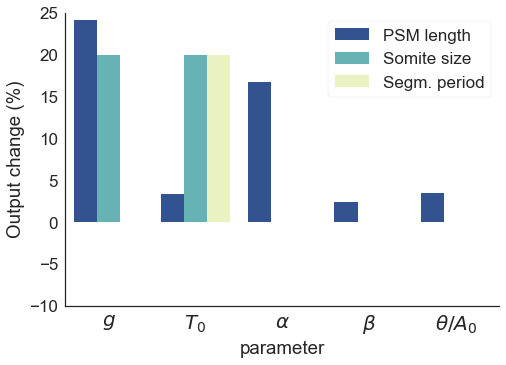

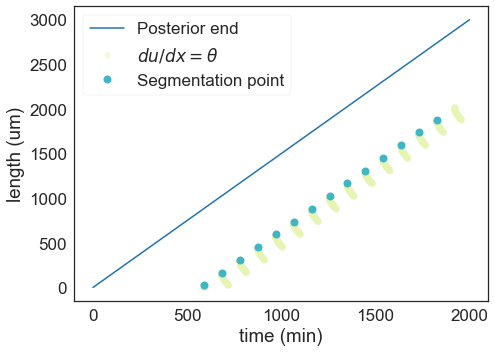

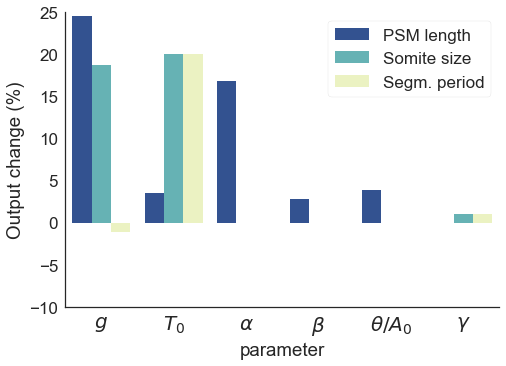

In [2]:
p = {}
p['a']  = 140.
p['b']  = 1200.
p['T0'] = 100.
p['theta'] = 1.
p['gamma'] = None

d = {}
d['t'] = np.arange(0, 2000, 1)
d['g'] = 1.5*np.ones(len(d['t']))
d['L_ef'] = d['g']*d['t']

out = plotf.segmentation_points(d, p)
l_pars = ['g', 'T0', 'a', 'b', 'theta']
xlabel = [r'$g$', r'$T_0$', r'$\alpha$', r'$\beta$', r'$\theta/A_0$']
plotf.sensitive_analysis(d, copy.copy(p), l_pars, xlabel=xlabel)

# Considering that the A and T are dependent on the growth rate
p['gamma'] = 30.
out = plotf.segmentation_points(d, p)
l_pars = ['g', 'T0', 'a', 'b', 'theta', 'gamma']
xlabel = [r'$g$', r'$T_0$', r'$\alpha$', r'$\beta$', r'$\theta/A_0$', r'$\gamma$']
plotf.sensitive_analysis(d, copy.copy(p), l_pars, xlabel=xlabel)




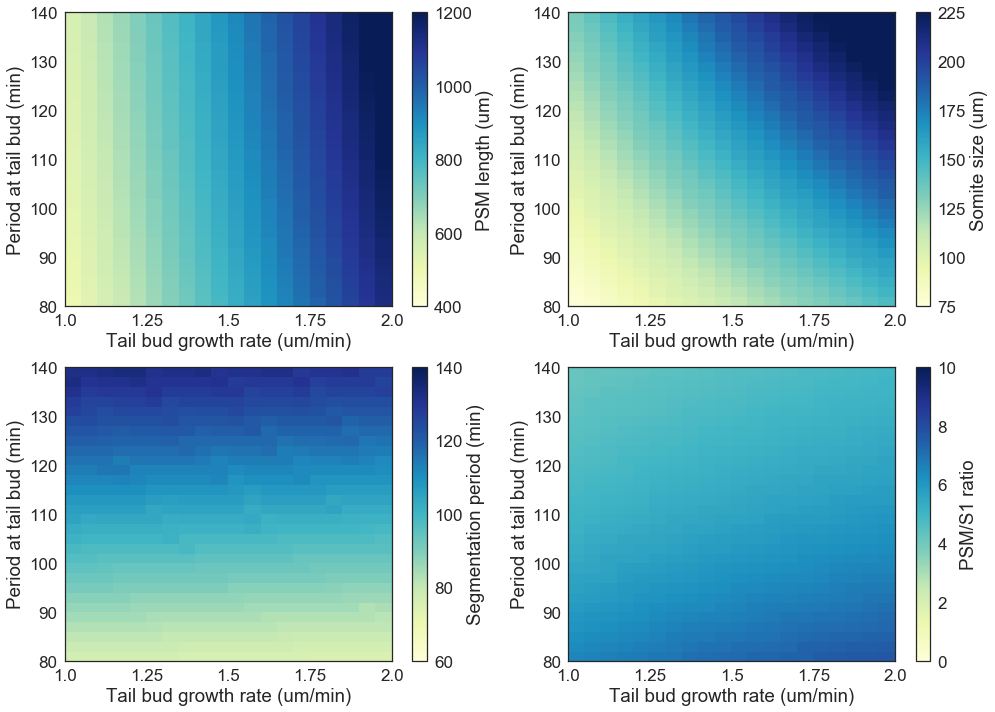

In [3]:
ri = np.arange(1.0, 2.001, 0.05)
rj = np.arange(80, 141, 2)
crange = [np.arange(400, 1201, 200), np.arange(75, 226, 25), np.arange(60, 141, 20), np.arange(0, 11, 2)]

plotf.phaseDiagram_gxT0(d, p, ri, rj, crange, nticks=5)#, save_fig='./figures/PhaseDiagram_gxT0_mouse.pdf')

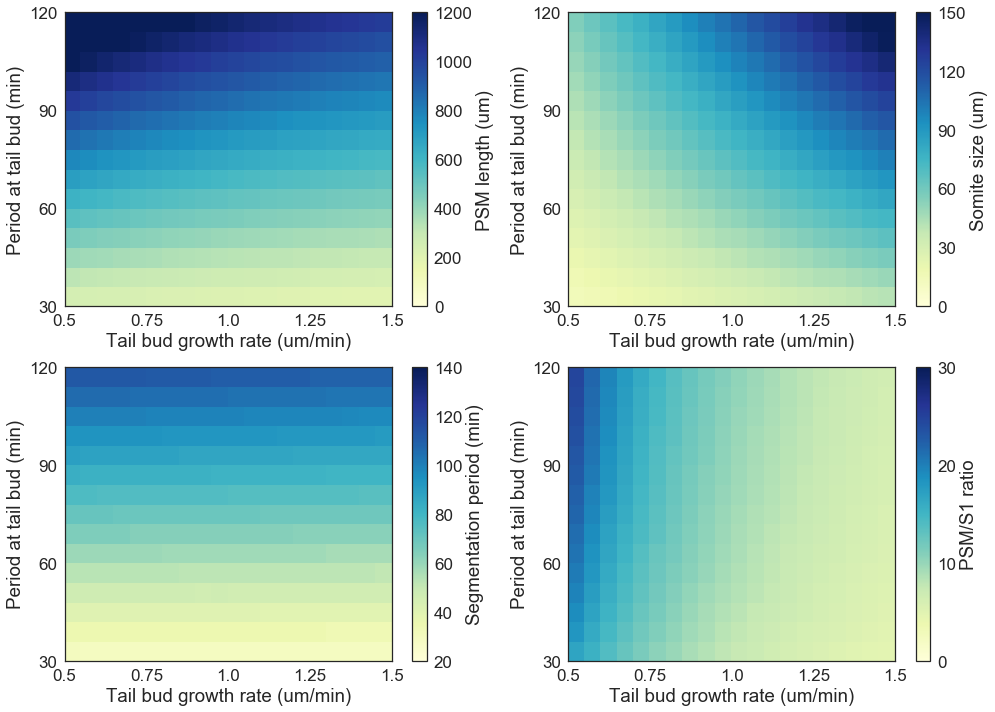

In [4]:
d['t'] = np.arange(0, 5000, 1)
d['g'] = 1.5*np.ones(len(d['t']))
d['L_ef'] = d['g']*d['t']

ri = np.arange(0.50, 1.51, 0.05)
rj = np.arange(30, 121, 6)
crange = [np.arange(0, 1201, 200), np.arange(0, 151, 30), np.arange(20, 141, 20), np.arange(0, 31, 10)]
plotf.phaseDiagram_gxT0(d, p, ri, rj, crange, inter_species=True, nticks=5)#, save_fig='./figures/PhaseDiagram_gxT0_interSpecies.pdf')

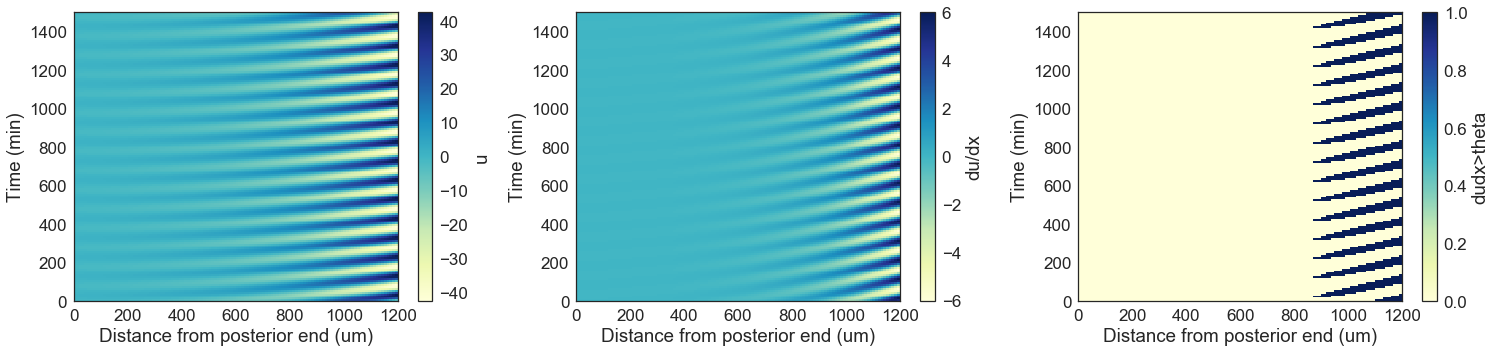

In [5]:
p['gamma'] = None
Dx=np.arange(0, 1201, 10) #ri
trange = np.arange(0, 1501, 10) #rj
p['g'] = 1.5
plotf.oscillatorProperties(d, p, Dx, trange, nticks=20)#, save_fig='./figures/KimographSegmentationPoints_mouse.pdf')

[-1.47351777  2.52075341]


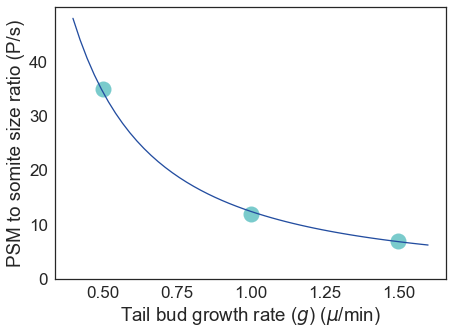

In [6]:
x  = np.log(np.array([0.50, 1.00, 1.50]))
y  = np.log(np.array([35.0, 12.0,  7.0]))
xr = np.log(np.linspace(0.4, 1.6, 51))

pfit = np.polyfit(x, y, 1)
ynew = np.polyval(pfit, xr)    

cmap = plt.cm.YlGnBu
f = plt.subplots(1, 1, figsize=(7, 5), sharey=False)
ax = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
plt.plot(np.exp(x), np.exp(y), 'o', ms=16, c=cmap(0.45), alpha=0.8)
plt.plot(np.exp(xr), np.exp(pfit[1]  + pfit[0]*(xr)), c=cmap(0.8))
plt.ylabel('PSM to somite size ratio (P/s)')
plt.xlabel(r'Tail bud growth rate ($g$) ($\mu$/min)')
plt.yticks(np.arange(0, 41, 10))
plt.xticks(np.arange(0.5, 1.51, 0.25))
# plt.savefig('../figures/ConstantGrowth_PSMsomiteRatioxg.pdf', format='pdf')
print pfit

In [7]:
def video_segmentationMousexSnake(p_mouse, p_snake, p_zfish, trange, Dx=np.arange(0,1500,2)):
    spoint = {}
    spoint['Mouse/Chicken'] = [np.max(Dx)]
    spoint['Snake']         = [np.max(Dx)]
    spoint['Zebrafish']     = [np.max(Dx)]
    for i in range(len(trange)):
        f = plt.subplots(2, 3, figsize=(15, 4), sharey=False)
        for j in range(3):
            if j==0:
                p = p_mouse
                s = 'Mouse/Chicken'
            elif j==1:
                p = p_snake
                s = 'Snake'
            else:
                p = p_zfish
                s = 'Zebrafish'
            ax = plt.subplot2grid((2, 3), (0, j), colspan=1, rowspan=1)   
            fs = modelf.dudx(Dx/p['g'], p, t0=(trange[i] - Dx/p['g']), dt0=1.0/p['g'])
            if np.sum(fs>p['theta']):
                js = np.argmax(fs>p['theta'])
                if Dx[js]<spoint[s][-1]:
                    spoint[s] += [Dx[js]]
                
            plt.plot(Dx[Dx<spoint[s][-1]], fs[Dx<spoint[s][-1]], lw=2.5)
            for k in range(len(spoint[s])):
                plt.plot([spoint[s][k], spoint[s][k]], [-p['theta']*1.5, p['theta']*1.5], 'm-', lw=1.0)
                spoint[s][k] += p['g']*dt
            plt.ylim([-p['theta']*1.5, p['theta']*1.5])
            plt.xlim([0, np.max(Dx)])
            plt.plot(Dx, p['theta']*np.ones(len(Dx)), '--')
            plt.title(s if j!=1 else s + ' - time = '+str(trange[i])+' min')
            plt.ylabel('du/dx')
            plt.xticks([])
            plt.yticks([])

            ax = plt.subplot2grid((2, 3), (1, j), colspan=1, rowspan=1)   
            plt.plot(Dx[Dx<spoint[s][-1]], modelf.u(Dx, p, trange[i])[Dx<spoint[s][-1]], lw=2.5)
            plt.xlabel('Distance from tip')
            plt.ylabel('u')
            plt.ylim([-80, 80])
            plt.yticks([])
            plt.xlim([0, np.max(Dx)])
        plt.tight_layout()
        plt.savefig('./movie_figures/mf_0'+str(i)+'.png' if (i<10) else './movie_figures/mf_'+str(i)+'.png', 
                    format='png', dpi=200)
        if i==(len(trange)-1):
            plt.savefig('./movie_figures/Snapshot.pdf', format='pdf', dpi=200)

        plt.close()


        
        
        
# p2['T0'] = ri[i]
# p2['w0'] = 2*np.pi/p2['T0']
# p2['g'] = rj[j]
# p2['a'] = p['a']*((rj[j]/g)**1.5)*((T0/ri[i])**0.5)
# p2['b'] = p['b']*((rj[j]/g)**1.5)*((T0/ri[i])**0.5)
# psm[i,j], xl[i,j], ts[i,j]  = plot_modelfit(p2, show_plot=False)

        
p_mouse = {}
p_mouse['T0'] = 100.0
p_mouse['g']  = 1.5
p_mouse['a']  = 140
p_mouse['b']  = 1200
p_mouse['gamma'] = None
p_mouse['theta'] = 1.0

p_snake = {}
p_snake['T0'] = 90
p_snake['g'] = 0.5
p_snake['a']  = p_mouse['a']*((p_snake['T0']/p_mouse['T0']))*((p_mouse['g']/p_snake['g'])**1.5)
p_snake['b']  = p_mouse['b']*((p_snake['T0']/p_mouse['T0']))*((p_mouse['g']/p_snake['g'])**1.5)
p_snake['gamma'] = p_mouse['gamma']
p_snake['theta'] = p_mouse['theta']


p_zfish = {}
p_zfish['T0'] = 30
p_zfish['g'] = 0.8
p_zfish['a']  = p_mouse['a']*((p_zfish['T0']/p_mouse['T0']))*((p_mouse['g']/p_zfish['g'])**1.5)
p_zfish['b']  = p_mouse['b']*((p_zfish['T0']/p_mouse['T0']))*((p_mouse['g']/p_zfish['g'])**1.5)
p_zfish['gamma'] = p_mouse['gamma']
p_zfish['theta'] = p_mouse['theta']


dt = 2
p_snake['t'] = np.arange(0, 3000, dt)
p_mouse['t'] = np.arange(0, 3000, dt)
p_zfish['t'] = np.arange(0, 3000, dt)

# psm, slen, tseg = modelf.model_properties(p_mouse, show_plot=True)
# print 'Properties mouse: PSM length', psm, 'segment length:', slen, 'segmentation period:', tseg
# psm, slen, tseg = plot_modelfit(p_snake, show_plot=True)
# print 'Properties snake: PSM length', psm, 'segment length:', slen, 'segmentation period:', tseg
# psm, slen, tseg = plot_modelfit(p_zfish, show_plot=True)
# print 'Properties zfish: PSM length', psm, 'segment length:', slen, 'segmentation period:', tseg
plt.show()

trange = np.arange(0, 1500, 2)
# trange = np.arange(0, 1500, 50)
video_segmentationMousexSnake(p_mouse, p_snake, p_zfish, trange, Dx=np.arange(0,1200,2))

In [7]:
# %%bash
# rm ./movie_figures/movie.mp4

# ffmpeg -framerate 10.0 -i ./movie_figures/mf_%02d.png ./movie_figures/movie.mp4
# # ffmpeg/ffmpeg -framerate 10.0 -i ./movie_figures/mf_%02d.png ./movie_figures/movie.mp4
# totem ./movie_figures/movie.mp4